In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import math
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error,
    r2_score,
    mean_squared_log_error,
)

from  sklearn.preprocessing import MinMaxScaler
from rich.console import Console
from rich.table import Table
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [117]:
df = pd.read_csv('/Users/victoroliveira/Desktop/vonix-py-statistic/src/vonixstatisc/data/pandas_data/data_fluency_queue_200.csv')
#df_march = df.loc[df['month']== 'March']
#df_march = df_march.loc[(df_march['handling_time'] > 10)]
#df_march_queue = df_march.loc[(df_march['queue_id']) == 'mgmsales']
#df_march_queue_1140 = df_march_queue.loc[(df_march['agent_id']) == 1600]

In [118]:
df

,agent_id,queue_id,direction,locality_id,call_type_id,hold_secs,ring_secs,initial_position,trunking_id,carrier_id,week_day,month,date,day_time,datetime,timestamp,handling_time
0,1000,equipez4,OUT,66000.0,3,0,7,0,1,1.0,4,February,2023-23-02,20:02:36,2023-02-23 20:54:36,1677185676,78
1,1000,equipez4,AUTO,91.0,5,1,0,1,1,3.0,4,February,2023-23-02,21:02:47,2023-02-23 21:12:47,1677186767,3
2,1000,equipez4,AUTO,89.0,5,1,0,1,1,67.0,4,February,2023-23-02,21:02:26,2023-02-23 21:13:26,1677186806,5
3,1000,equipez4,AUTO,48.0,4,14,0,2,1,1.0,4,February,2023-23-02,21:02:26,2023-02-23 21:13:26,1677186806,2
4,1000,equipez4,AUTO,31.0,5,2,0,1,1,3.0,4,February,2023-23-02,21:02:44,2023-02-23 21:13:44,1677186824,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104764,1573,isnrecuperacao,OUT,11.0,5,0,15,0,1,1.0,1,April,2023-24-04,21:04:26,2023-04-24 21:02:26,1682370146,47
104765,1137,isjaguars,OUT,21.0,5,0,15,0,1,3.0,1,April,2023-24-04,21:04:36,2023-04-24 21:02:36,1682370156,70
104766,1572,isnxsell,OUT,11.0,5,0,40,0,1,3.0,1,April,2023-24-04,21:04:44,2023-04-24 21:02:44,1682370164,2
104767,1600,mgmsales,OUT,89.0,5,0,16,0,1,5.0,1,April,2023-24-04,21:04:51,2023-04-24 21:02:51,1682370171,4


In [119]:
normalizador = MinMaxScaler(feature_range=(0,1))

In [120]:
df_10 = df.loc[(df['handling_time'] > 10)]
df_10_queue = df_10.loc[df_10['queue_id'] == 'equipez4']
df_10_queue

,agent_id,queue_id,direction,locality_id,call_type_id,hold_secs,ring_secs,initial_position,trunking_id,carrier_id,week_day,month,date,day_time,datetime,timestamp,handling_time
0,1000,equipez4,OUT,66000.0,3,0,7,0,1,1.0,4,February,2023-23-02,20:02:36,2023-02-23 20:54:36,1677185676,78
4,1000,equipez4,AUTO,31.0,5,2,0,1,1,3.0,4,February,2023-23-02,21:02:44,2023-02-23 21:13:44,1677186824,23
5,1116,equipez4,OUT,14.0,5,0,10,0,1,5.0,5,February,2023-24-02,13:02:11,2023-02-24 13:04:11,1677243851,48
6,1116,equipez4,OUT,11.0,5,0,50,0,1,3.0,5,February,2023-24-02,13:02:12,2023-02-24 13:08:12,1677244092,53
7,1116,equipez4,OUT,NaN,5,0,11,0,1,NaN,5,February,2023-24-02,13:02:08,2023-02-24 13:43:08,1677246188,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85438,1629,equipez4,AUTO,81.0,5,10,1,1,1,1.0,3,April,2023-12-04,23:04:29,2023-04-12 23:42:29,1681342949,15
87848,1648,equipez4,OUT,21.0,5,0,7,0,1,5.0,4,April,2023-13-04,20:04:05,2023-04-13 20:51:05,1681419065,186
88545,1587,equipez4,OUT,71.0,5,0,8,0,1,3.0,4,April,2023-13-04,21:04:18,2023-04-13 21:54:18,1681422858,36
89113,1587,equipez4,OUT,71.0,5,0,6,0,1,3.0,5,April,2023-14-04,14:04:47,2023-04-14 14:52:47,1681483967,17


In [121]:
df_10_march = df_10_queue.loc[(df_10_queue['month'] == 'March')]

In [115]:
from datetime import datetime
from time import gmtime, strftime
import time
def transform_dict(data: dict, period: int) -> dict:
    """method that receives dict from database query
    {start_at(timestamp): talk_secs(seconds), ...} and create
    another dict based on the period (15, 30, 1hr) chosen
    {last_timestamp: [12,24,56,12, 90, 100], last_timestamp - period:[195,235,201,300], ... interval of three minutes for standard model}
    For standard model the data from the last period( 15 min, 30 min, 1h) is used to construct forecast for the next period so the return_dict begins with the last timestamp to the first
    """
    seconds = period * 60
    
    return_dict = {}

    keys_array = list(data.keys())
    beginning = keys_array[0]
    limit= beginning + seconds
    end = keys_array[-1]
    arr = []
    break_v = 1
    while beginning < end:
        if break_v == beginning:
            break
        break_v = beginning
        for key, value in data.items():
            if key <= limit:
                arr.append(value)
                continue
        
            return_dict[f"{beginning}"] = arr
            arr = []
            arr.append(value)
            beginning = key
            limit = beginning + seconds
            

    return return_dict
#datetime.fromtimestamp(end).strftime('%d/%m %H:%M')

def z_clean_outliers(time_array: list) -> list:
    """method to clean outliers of dict
    { 90: [12,24,56,12], 180: [165,235,12,9], ... interval of three minutes}
    for standard model based on z-score method"""

    threshold = 2
    arr = []
    mean = np.mean(time_array)
    std = np.std(time_array)
    for h_time in time_array:
        if h_time - mean == 0:
           arr.append(h_time)
           continue
        
        z_score = (h_time - mean) / std
        #print({'z_score':z_score, 'h_time':h_time})
        if np.abs(z_score) < threshold:
           arr.append(h_time)  
            
    return arr

In [122]:
df_10_march_hw = pd.DataFrame()
#df_10_march_hw['period'] = pd.to_datetime(df_10_march['datetime'], format='%Y-%m-%d %H:%M:%S')
df_10_march_hw['period'] = df_10_march['timestamp']
df_10_march_hw['handling_time'] = normalizador.fit_transform(df_10_march['handling_time'])
#pd.set_option('display.max_rows', None)


ValueError: Expected 2D array, got 1D array instead:
array=[159.  24.  15. ...  64.  57. 158.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [56]:
dict_10_march_hw_tr = transform_dict(df_10_march_hw.set_index('period').to_dict()['handling_time'], 60)

In [57]:
dict_90_queue_day_1_tr_clean = {i:z_clean_outliers(dict_10_march_hw_tr[i]) for i in dict_10_march_hw_tr.keys() }
dict_10_march_hw_tr_mean = {i:round(np.mean(dict_90_queue_day_1_tr_clean[i])) for i in dict_90_queue_day_1_tr_clean.keys()}

In [108]:
df_hw = pd.DataFrame()
df_hw['timestamp'] = dict_10_march_hw_tr_mean.keys()
df_hw['period'] = pd.to_datetime([datetime.fromtimestamp(int(i)).strftime('%Y-%m-%d %H:%M:%S') for i in dict_10_march_hw_tr_mean.keys()], format='%Y-%m-%d %H:%M:%S')
df_hw['mean'] = dict_10_march_hw_tr_mean.values()
df_hw['day'] = [datetime.fromtimestamp(int(i)).strftime('%d') for i in dict_10_march_hw_tr_mean.keys()]
df_hw['hour'] = [datetime.fromtimestamp(int(i)).strftime('%H') for i in dict_10_march_hw_tr_mean.keys()]
df_hw['minute'] = [datetime.fromtimestamp(int(i)).strftime('%M') for i in dict_10_march_hw_tr_mean.keys()]
df_hw['week_day'] = [datetime.fromtimestamp(int(i)).strftime('%A') for i in dict_10_march_hw_tr_mean.keys()]
df_hw
#pd.set_option('display.max_rows', None)
df_hw_to = df_hw.loc[(df_hw['week_day'] == 'Thursday')]
df_hw_to

,timestamp,period,mean,day,hour,minute,week_day
8,1677759593,2023-03-02 08:19:53,21,02,08,19,Thursday
9,1677764395,2023-03-02 09:39:55,23,02,09,39,Thursday
10,1677768071,2023-03-02 10:41:11,46,02,10,41,Thursday
11,1677772346,2023-03-02 11:52:26,41,02,11,52,Thursday
12,1677776064,2023-03-02 12:54:24,62,02,12,54,Thursday
13,1677779798,2023-03-02 13:56:38,39,02,13,56,Thursday
14,1677783473,2023-03-02 14:57:53,37,02,14,57,Thursday
15,1677787370,2023-03-02 16:02:50,35,02,16,02,Thursday
16,1677792370,2023-03-02 17:26:10,59,02,17,26,Thursday
17,1677796685,2023-03-02 18:38:05,74,02,18,38,Thursday


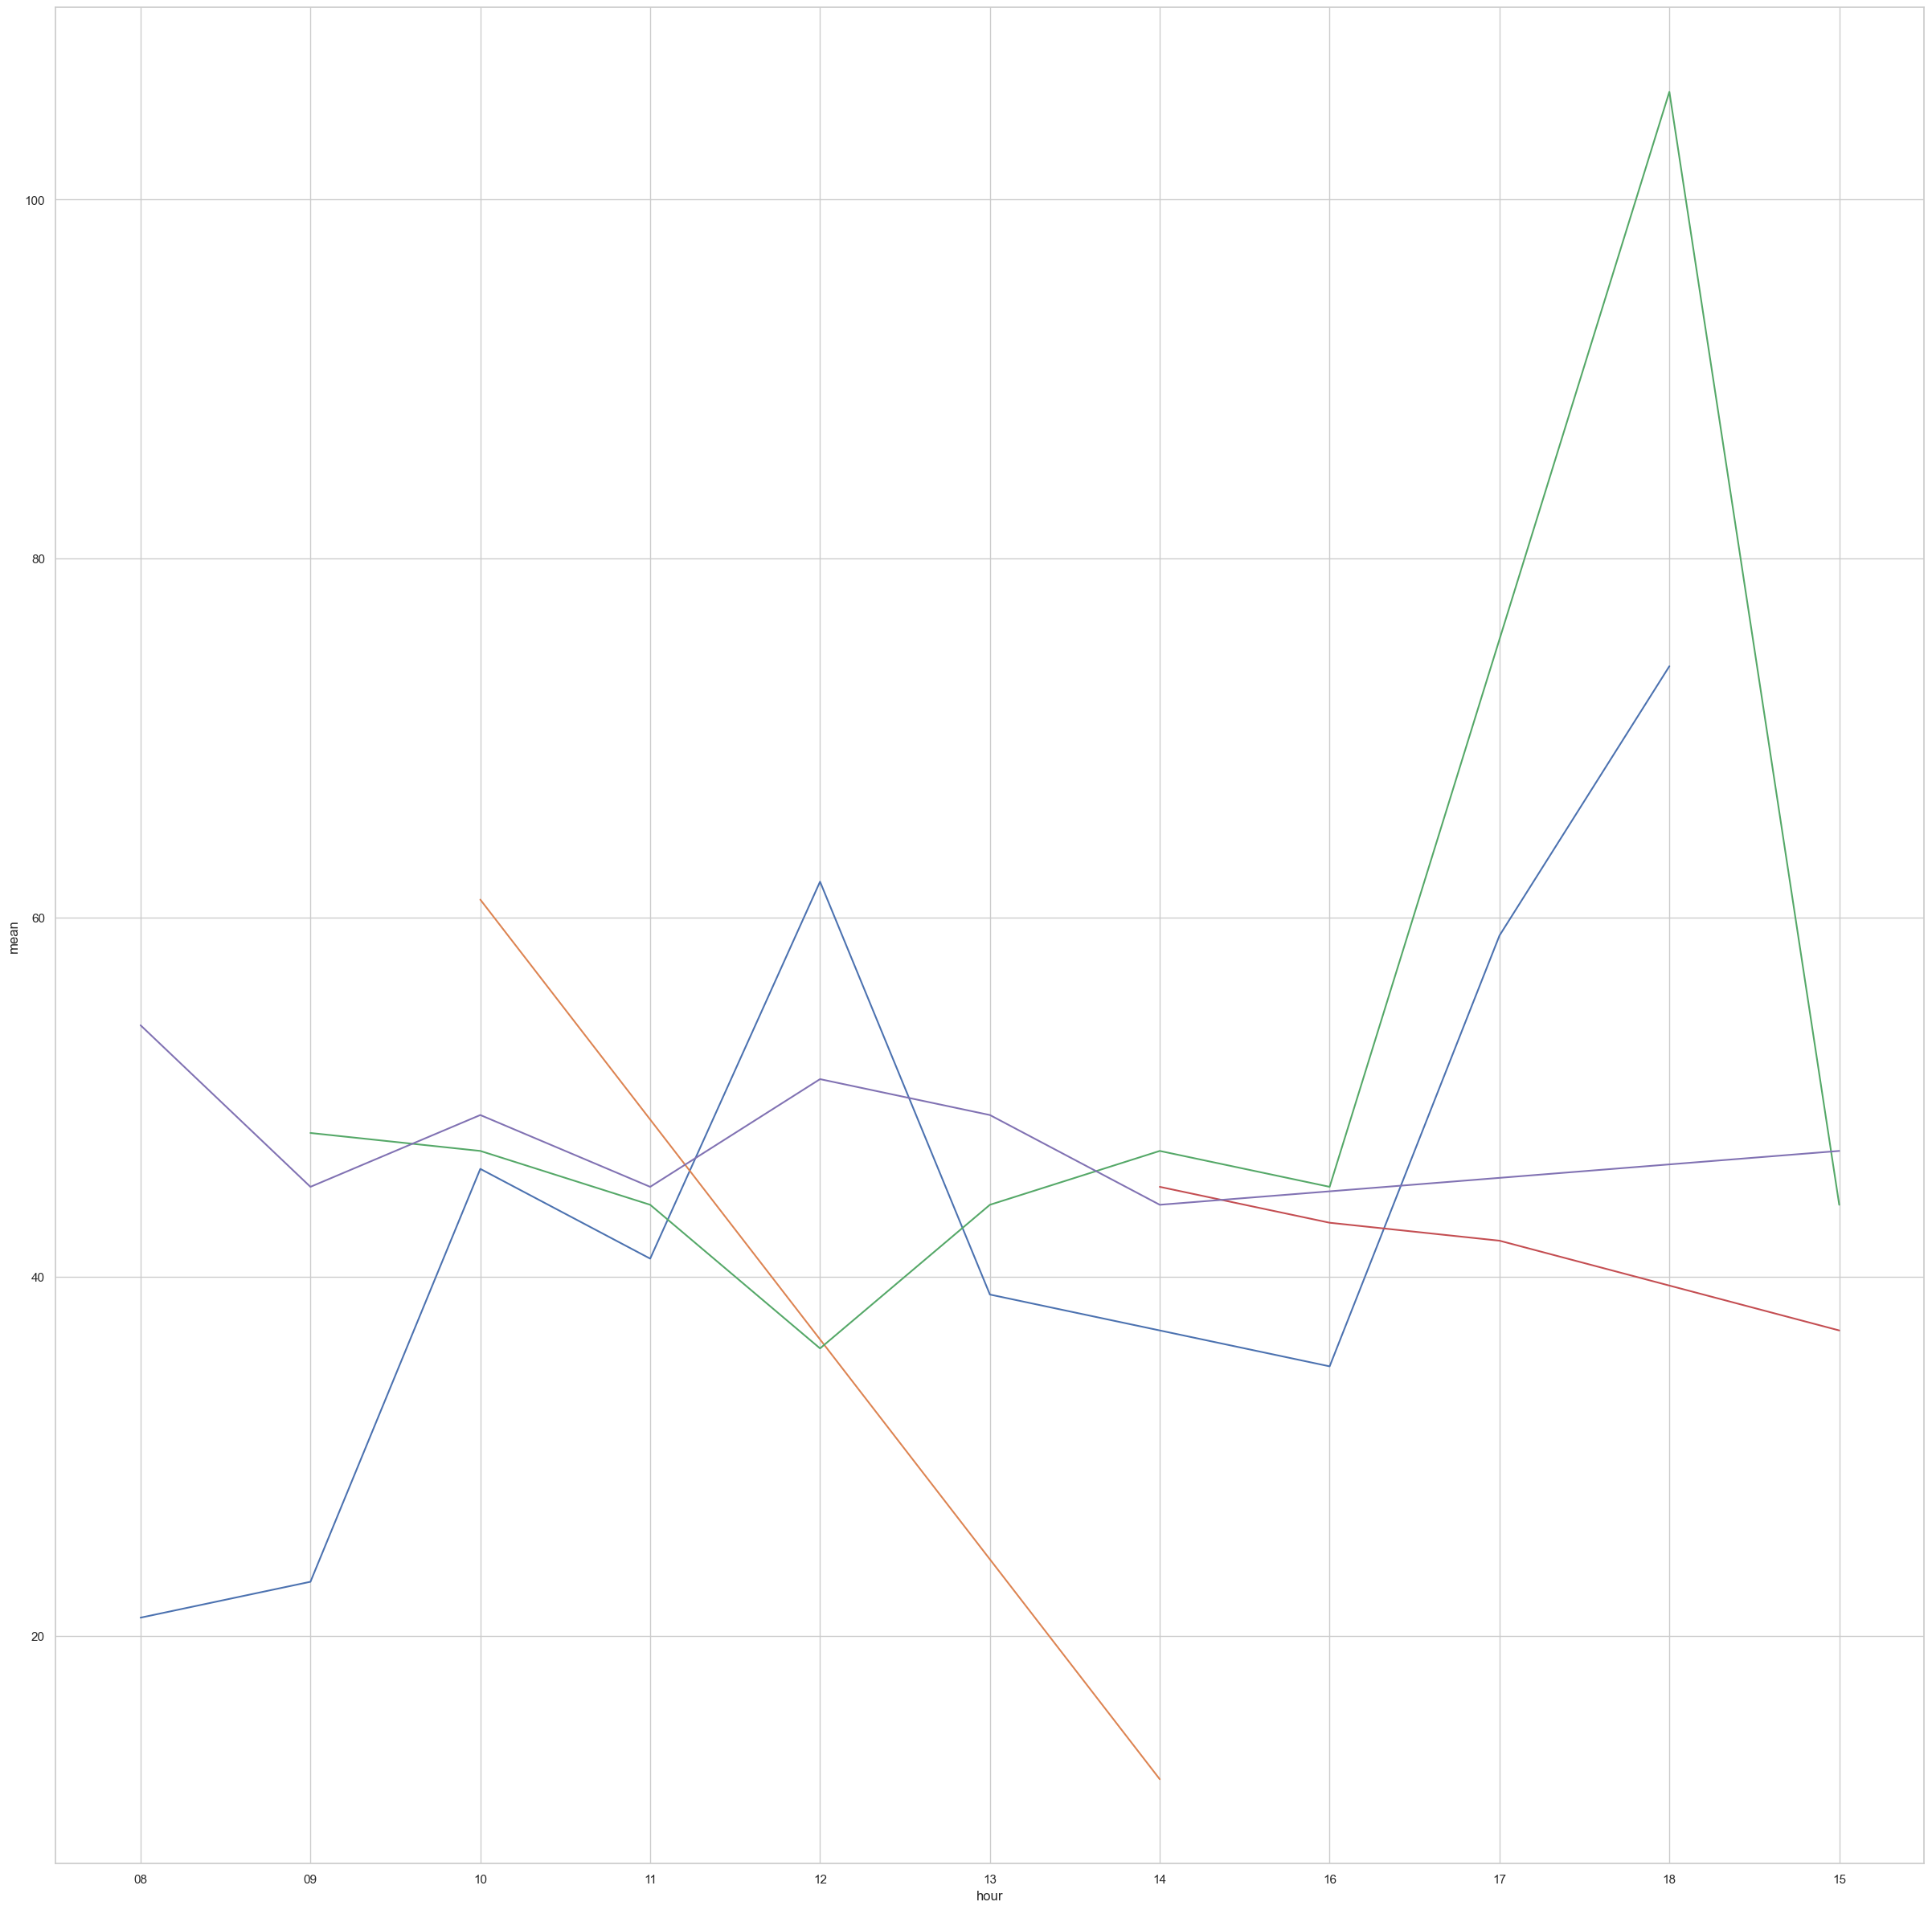

In [109]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (30,30))
sns.lineplot(df_hw_to.loc[(df_hw_to['day'] == '02')], x="hour", y="mean")
sns.lineplot(df_hw_to.loc[(df_hw_to['day'] == '09')], x="hour", y="mean")
sns.lineplot(df_hw_to.loc[(df_hw_to['day'] == '16')], x="hour", y="mean")
sns.lineplot(df_hw_to.loc[(df_hw_to['day'] == '23')], x="hour", y="mean")
sns.lineplot(df_hw_to.loc[(df_hw_to['day'] == '30')], x="hour", y="mean")

plt.show()

In [68]:
df_hw_cut = pd.DataFrame()
df_hw_cut['datetime']=df_hw['period']
df_hw_cut['mean_handling_time']=df_hw['mean']
df_hw_cut.set_index('datetime')

,mean_handling_time
datetime,
2023-03-01 09:11:17,159
2023-03-01 10:13:33,28
2023-03-01 11:25:29,30
2023-03-01 13:08:37,76
2023-03-01 14:24:50,41
...,...
2023-03-30 11:38:51,45
2023-03-30 12:40:51,51
2023-03-30 13:41:01,49


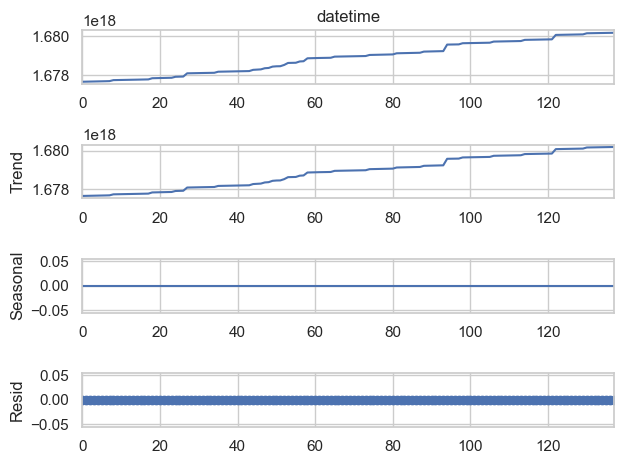

In [69]:

decompose_result = seasonal_decompose(df_hw_cut['datetime'],model='additive', period =1)
decompose_result.plot();
#https://stackoverflow.com/questions/60017052/decompose-for-time-series-valueerror-you-must-specify-a-period-or-x-must-be option 2

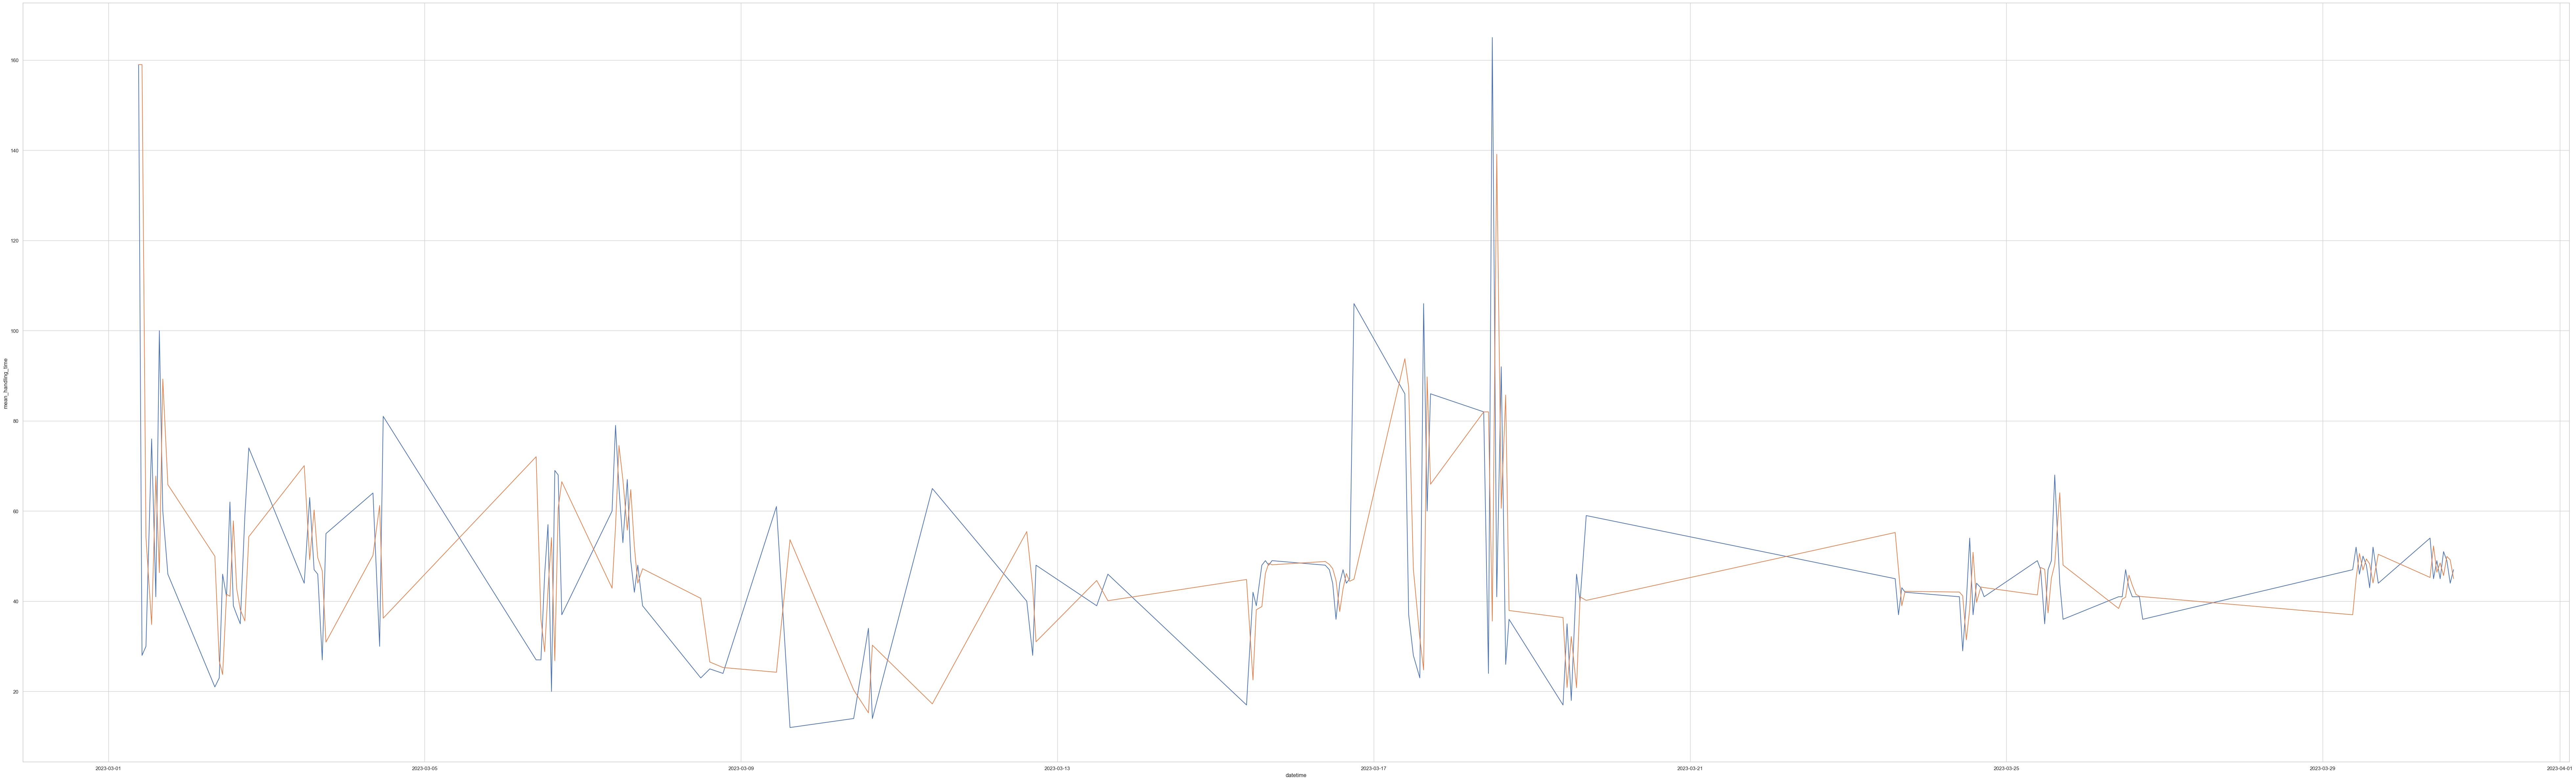

In [74]:
df_hw_cut['HWES1'] = SimpleExpSmoothing(df_hw_cut['mean_handling_time']).fit(smoothing_level = 0.8 ,optimized=False,use_brute=True).fittedvalues
plt.figure(figsize = (100,30))
sns.lineplot(df_hw_cut, x="datetime", y="mean_handling_time")
sns.lineplot(df_hw_cut, x="datetime", y="HWES1")
plt.show()

/opt/homebrew/anaconda3/envs/vonix-statistic/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


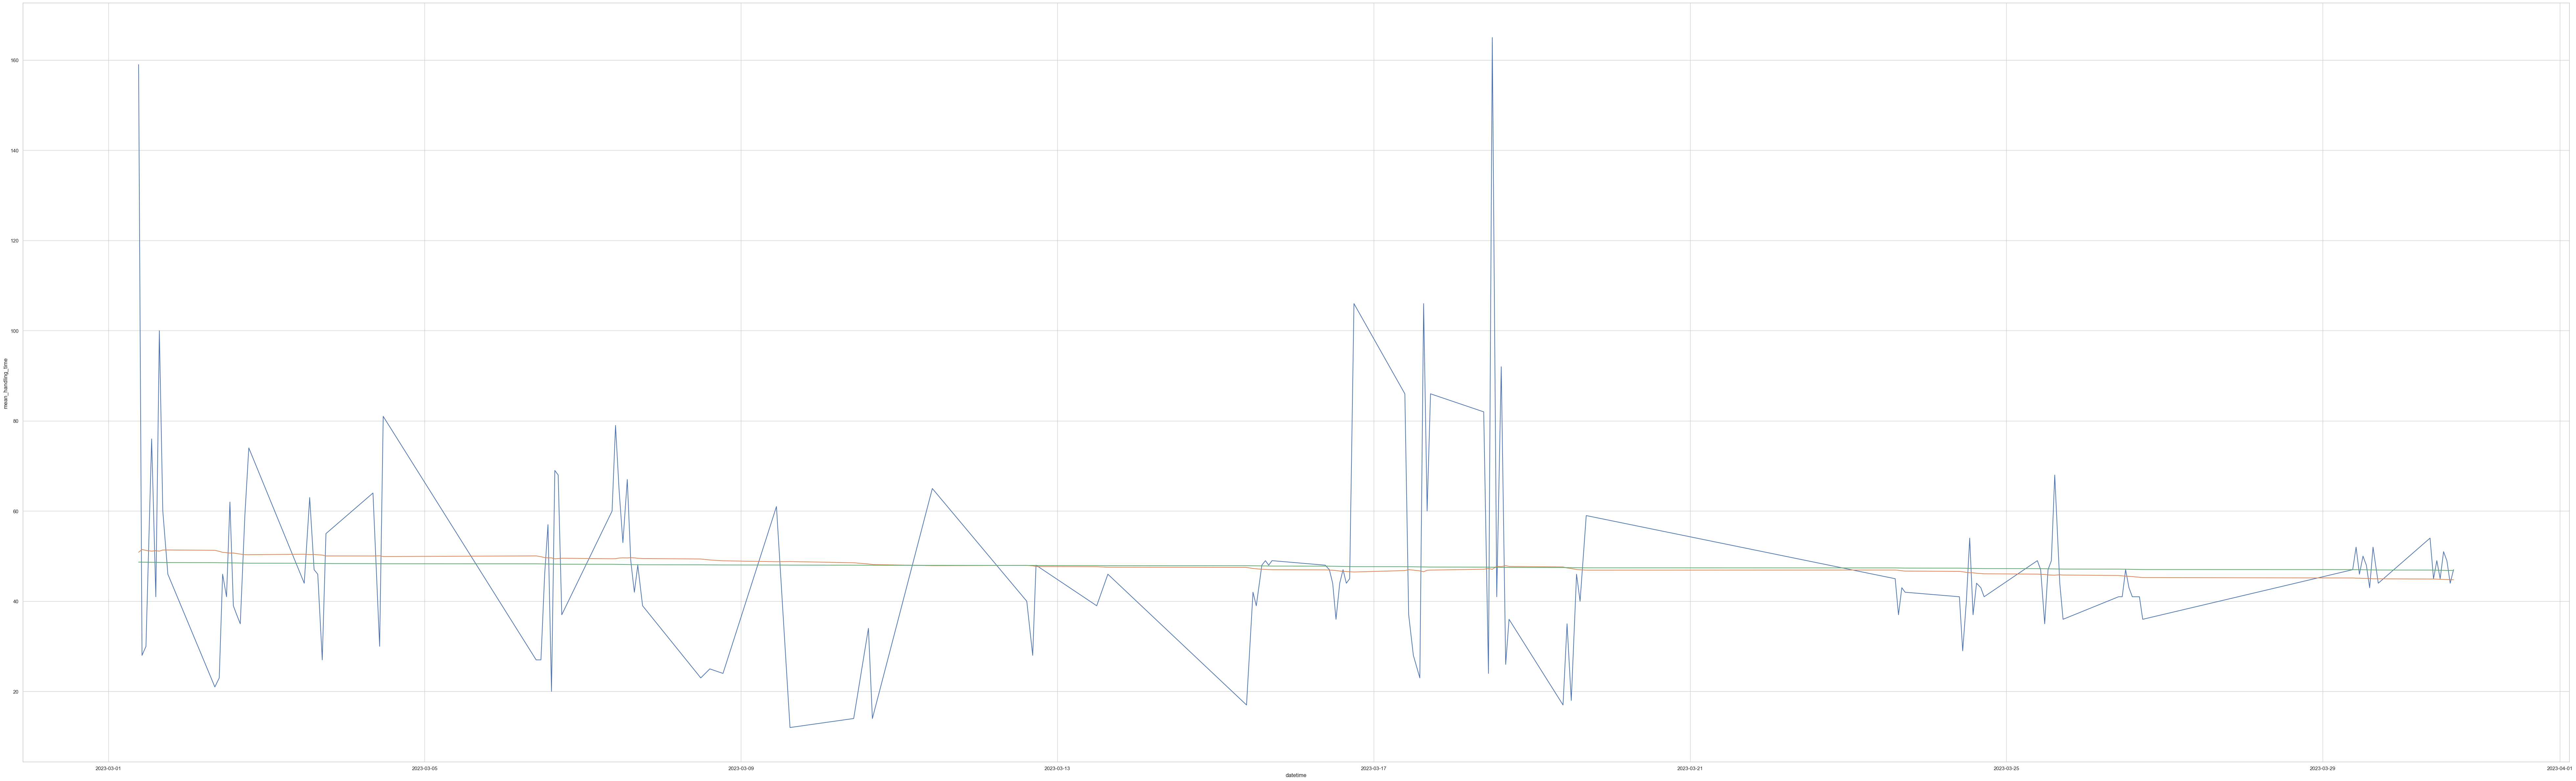

In [77]:
df_hw_cut['HWES1_add'] = ExponentialSmoothing(df_hw_cut['mean_handling_time'], trend = 'add').fit().fittedvalues
df_hw_cut['HWES1_mul'] = ExponentialSmoothing(df_hw_cut['mean_handling_time'], trend = 'mul').fit().fittedvalues
df_hw_cut
plt.figure(figsize = (100,30))
sns.lineplot(df_hw_cut, x="datetime", y="mean_handling_time")
sns.lineplot(df_hw_cut, x="datetime", y="HWES1_add")
sns.lineplot(df_hw_cut, x="datetime", y="HWES1_mul")
plt.show()